### Importing Libraries & Files

In [145]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
from glob import glob
%matplotlib inline 

In [146]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData\\bom.movie_gross.csv.gz',
 './zippedData\\imdb.name.basics.csv.gz',
 './zippedData\\imdb.title.akas.csv.gz',
 './zippedData\\imdb.title.basics.csv.gz',
 './zippedData\\imdb.title.crew.csv.gz',
 './zippedData\\imdb.title.principals.csv.gz',
 './zippedData\\imdb.title.ratings.csv.gz',
 './zippedData\\tmdb.movies.csv.gz',
 './zippedData\\tn.movie_budgets.csv.gz']

In [147]:
tsv_files = glob("./zippedData/*.tsv.gz")
tsv_files

['./zippedData\\rt.movie_info.tsv.gz', './zippedData\\rt.reviews.tsv.gz']

### Creating dictionary of dataframes
With the function below
* we're creating a dictionary
* There are two types of files, csv and tsv. tsv needs '\t'
* looping through each of the files and opening them as dataframes
* now we have a dictionary of dataframes
* encoding= 'unicode_escape' is to solve the utf-8 error

In [148]:
data_dict = {}

for file in csv_files:
    data_dict[file] = pd.read_csv(file)
    
for file in tsv_files:
    data_dict[file] = pd.read_csv(file, sep='\t', encoding= 'unicode_escape')

##### Giving variables to each dataframe

In [149]:
imdb_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_df1 = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_df2 = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_df3 = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_df4 = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_df5 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz') 

In [150]:
print(imdb_df.shape,imdb_df1.shape,imdb_df2.shape,imdb_df3.shape,imdb_df4.shape,imdb_df5.shape,tmdb_df.shape,bom.shape,tn.shape)

(606648, 6) (331703, 8) (146144, 6) (146144, 3) (1028186, 6) (73856, 3) (26517, 10) (3387, 5) (5782, 6)


#### The Goal is to find the null values in each DataFrame and cleaning them

##### Cleaning imdb_df 
* pd.read_csv('zippedData/imdb.name.basics.csv.gz')

In [151]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [152]:
imdb_df.isnull().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [153]:
imdb_df.describe()

,birth_year,death_year
count,82736.000000,6783.000000
mean,1967.043826,2000.523367
std,22.122190,43.951530
min,1.000000,17.000000
25%,1957.000000,2001.000000
50%,1971.000000,2013.000000
75%,1981.000000,2016.000000
max,2014.000000,2019.000000


In [154]:
imdb_df.head(2)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [155]:
imdb_df.columns

Index(['nconst', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'known_for_titles'],
      dtype='object')

In [156]:
imdb_df = imdb_df.drop(['birth_year', 'death_year'], axis=1)
imdb_df.head()

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [157]:
imdb_df.primary_name.nunique()

577203

In [158]:
imdb_df.describe()

,nconst,primary_name,primary_profession,known_for_titles
count,606648,606648,555308,576444
unique,606648,577203,8647,482207
top,nm6954493,James Brown,actor,tt4773466
freq,1,16,88306,45


In [159]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 4 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: object(4)
memory usage: 18.5+ MB


In [160]:
imdb_df.isnull().sum()

nconst                    0
primary_name              0
primary_profession    51340
known_for_titles      30204
dtype: int64

In [161]:
imdb_df['primary_name'].value_counts()

James Brown         16
Michael Brown       16
David Brown         15
Michael Johnson     14
Mark Davis          13
                    ..
Camilla Gunnerud     1
Didier Enrique       1
Phil Melfi           1
Almuth Hattwich      1
Senna Hegde          1
Name: primary_name, Length: 577203, dtype: int64

In [162]:
imdb_df['primary_profession'].value_counts()

actor                                               88306
actress                                             58430
producer                                            23324
composer                                            20125
writer                                              18247
                                                    ...  
art_department,cinematographer,special_effects          1
composer,soundtrack,transportation_department           1
editor,location_management,special_effects              1
assistant_director,director,editorial_department        1
stunts,camera_department,actor                          1
Name: primary_profession, Length: 8647, dtype: int64

In [163]:
imdb_df['primary_profession'].describe()

count     555308
unique      8647
top        actor
freq       88306
Name: primary_profession, dtype: object

In [164]:
imdb_df['known_for_titles'].value_counts()

tt4773466                                  45
tt3014460                                  23
tt3428990                                  23
tt4803104                                  19
tt2120166                                  17
                                           ..
tt5922358,tt6368508,tt9651918,tt4411682     1
tt1459294,tt1234014,tt2352722,tt0388595     1
tt3361192,tt1603379,tt1545492               1
tt2455440                                   1
tt1615892,tt4831744,tt2093290,tt2834762     1
Name: known_for_titles, Length: 482207, dtype: int64

In [165]:
imdb_df['known_for_titles'].describe()

count        576444
unique       482207
top       tt4773466
freq             45
Name: known_for_titles, dtype: object

In [166]:
imdb_df['nconst'].value_counts()

nm6954493    1
nm5048525    1
nm3650024    1
nm5047260    1
nm8297340    1
            ..
nm0463539    1
nm5974820    1
nm0963103    1
nm1749112    1
nm5285099    1
Name: nconst, Length: 606648, dtype: int64

In [167]:
imdb_df.isnull().tail()

,nconst,primary_name,primary_profession,known_for_titles
606643,False,False,False,True
606644,False,False,False,False
606645,False,False,False,False
606646,False,False,False,True
606647,False,False,False,False


In [168]:
imdb_df[imdb_df.known_for_titles.isnull()]

,nconst,primary_name,primary_profession,known_for_titles
1282,nm10108345,Jiaxi Li,actor,NaN
1289,nm10113099,Greg Quibell,actor,NaN
1292,nm10114259,Vera Prifatamasari,actress,NaN
1296,nm10115487,Laurette De Haan,"director,writer,cinematographer",NaN
1297,nm10115788,Sustraida's Band,composer,NaN
...,...,...,...,...
606637,nm9989005,Jae-Hwan Kim,actor,NaN
606638,nm9989145,Szilvia Herr,actress,NaN
606641,nm9990047,Joseph Jackson,actor,NaN
606643,nm9990381,Susan Grobes,actress,NaN


In [169]:
imdb_df[imdb_df.primary_profession.isnull()]

,nconst,primary_name,primary_profession,known_for_titles
172,nm0120366,Ralph Bunche,NaN,"tt0044284,tt0040053,tt1801623,tt0236552"
371,nm0256636,Emperor Franz Josef,NaN,"tt0454492,tt4615796,tt0399852,tt0378168"
422,nm0278661,Renee Firestone,NaN,"tt0956313,tt2102508,tt0463998,tt0174852"
655,nm0441808,Mike Katz,NaN,"tt0076578,tt1640227,tt0120195,tt2205904"
929,nm0688002,Norman Podhoretz,NaN,"tt1195499,tt0058896,tt2319949,tt0277185"
...,...,...,...,...
606611,nm9964778,Brian Espitia,NaN,NaN
606615,nm9967439,Jade Doucette,NaN,NaN
606618,nm9969939,Anna Bligh,NaN,tt8694294
606622,nm9976388,Naomie Monplaisir,NaN,tt7948406


In [170]:
imdb_df.dropna(subset= ['primary_profession', 'known_for_titles'],how='all').shape 

(596615, 4)

In [171]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 4 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: object(4)
memory usage: 18.5+ MB


In [172]:
new_imdb_df = imdb_df.fillna(method = 'ffill')

In [173]:
new_imdb_df.describe() 

,nconst,primary_name,primary_profession,known_for_titles
count,606648,606648,606648,606648
unique,606648,577203,8647,482207
top,nm6954493,James Brown,actor,tt10366330
freq,1,16,98166,76


In [174]:

new_imdb_df.isnull().sum()


nconst                0
primary_name          0
primary_profession    0
known_for_titles      0
dtype: int64

In [175]:
new_imdb_df['known_for_titles'].value_counts()

tt10366330                                 76
tt10378590                                 52
tt4773466                                  45
tt10006280                                 40
tt9914828                                  36
                                           ..
tt4959440,tt5675084,tt4885986,tt5203456     1
tt0119050,tt6873414,tt0344379,tt0349594     1
tt2514832,tt1728240                         1
tt1379736,tt2852376,tt5265960,tt0841922     1
tt1615892,tt4831744,tt2093290,tt2834762     1
Name: known_for_titles, Length: 482207, dtype: int64

In [176]:
imdb_df['known_for_titles'].value_counts()

tt4773466                                  45
tt3014460                                  23
tt3428990                                  23
tt4803104                                  19
tt2120166                                  17
                                           ..
tt5922358,tt6368508,tt9651918,tt4411682     1
tt1459294,tt1234014,tt2352722,tt0388595     1
tt3361192,tt1603379,tt1545492               1
tt2455440                                   1
tt1615892,tt4831744,tt2093290,tt2834762     1
Name: known_for_titles, Length: 482207, dtype: int64

In [177]:
new_imdb_df['primary_profession'].value_counts()

actor                                                   98166
actress                                                 64627
producer                                                26452
composer                                                22872
writer                                                  20636
                                                        ...  
writer,production_manager,camera_department                 1
set_decorator,production_designer,writer                    1
production_designer,set_decorator,assistant_director        1
art_director,editor,cinematographer                         1
stunts,camera_department,actor                              1
Name: primary_profession, Length: 8647, dtype: int64

In [178]:
imdb_df['primary_profession'].value_counts()

actor                                               88306
actress                                             58430
producer                                            23324
composer                                            20125
writer                                              18247
                                                    ...  
art_department,cinematographer,special_effects          1
composer,soundtrack,transportation_department           1
editor,location_management,special_effects              1
assistant_director,director,editorial_department        1
stunts,camera_department,actor                          1
Name: primary_profession, Length: 8647, dtype: int64

#####  Cleaning imdb_df1 
* pd.read_csv('zippedData/imdb.title.akas.csv.gz')

In [179]:
imdb_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [180]:
imdb_df1.isnull().sum()

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [181]:
imdb_df1.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [182]:
imdb_df1.tail()

,title_id,ordering,title,region,language,types,attributes,is_original_title
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0


In [183]:
imdb_df1[imdb_df1.is_original_title.isnull()]

,title_id,ordering,title,region,language,types,attributes,is_original_title
76516,tt1572192,1,Scream Queen Campfire,US,NaN,NaN,NaN,NaN
161142,tt3300342,1,Misfortune,US,NaN,NaN,NaN,NaN
176091,tt2397619,10,Woody Allen: A Documentary,US,NaN,NaN,NaN,NaN
176092,tt2397619,1,Woody Allen: El documental,AR,NaN,NaN,NaN,NaN
176093,tt2397619,2,Woody Allen: Um Documentário,BR,NaN,NaN,NaN,NaN
176094,tt2397619,3,Woody Allen: A Documentary,DE,NaN,NaN,NaN,NaN
176095,tt2397619,4,Woody Allen: El documental,ES,NaN,NaN,NaN,NaN
176096,tt2397619,5,"Woody Allen: A Documentary - Manhattan, Movies...",FI,NaN,NaN,NaN,NaN
176097,tt2397619,6,"Woody Allen, a Documentary",FR,NaN,NaN,NaN,NaN
176098,tt2397619,7,Woody,IT,NaN,NaN,NaN,NaN


In [184]:
imdb_df1['is_original_title'].value_counts()

0.0    286978
1.0     44700
Name: is_original_title, dtype: int64

In [185]:
imdb_df1['region'].value_counts()

US      51490
XWW     18467
RU      13817
DE      11634
FR      10990
        ...  
VC          1
CSHH        1
WF          1
TM          1
KN          1
Name: region, Length: 213, dtype: int64

In [186]:
new_imdb_df1 = imdb_df1.drop(columns=['language', 'attributes'])

In [187]:
new_imdb_df1.head()

,title_id,ordering,title,region,types,is_original_title
0,tt0369610,10,Джурасик свят,BG,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,imdbDisplay,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,imdbDisplay,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,0.0
4,tt0369610,14,Jurassic World,FR,imdbDisplay,0.0


In [188]:
new_imdb_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 6 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
types                168447 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 15.2+ MB


In [189]:
new_imdb_df1['is_original_title'].fillna(method = 'bfill', inplace = True) 

In [190]:
new_imdb_df1['region'].describe() 

count     278410
unique       213
top           US
freq       51490
Name: region, dtype: object

In [191]:
new_imdb_df1['region'].value_counts().describe() 

count      213.000000
mean      1307.089202
std       4320.333484
min          1.000000
25%          5.000000
50%         31.000000
75%        577.000000
max      51490.000000
Name: region, dtype: float64

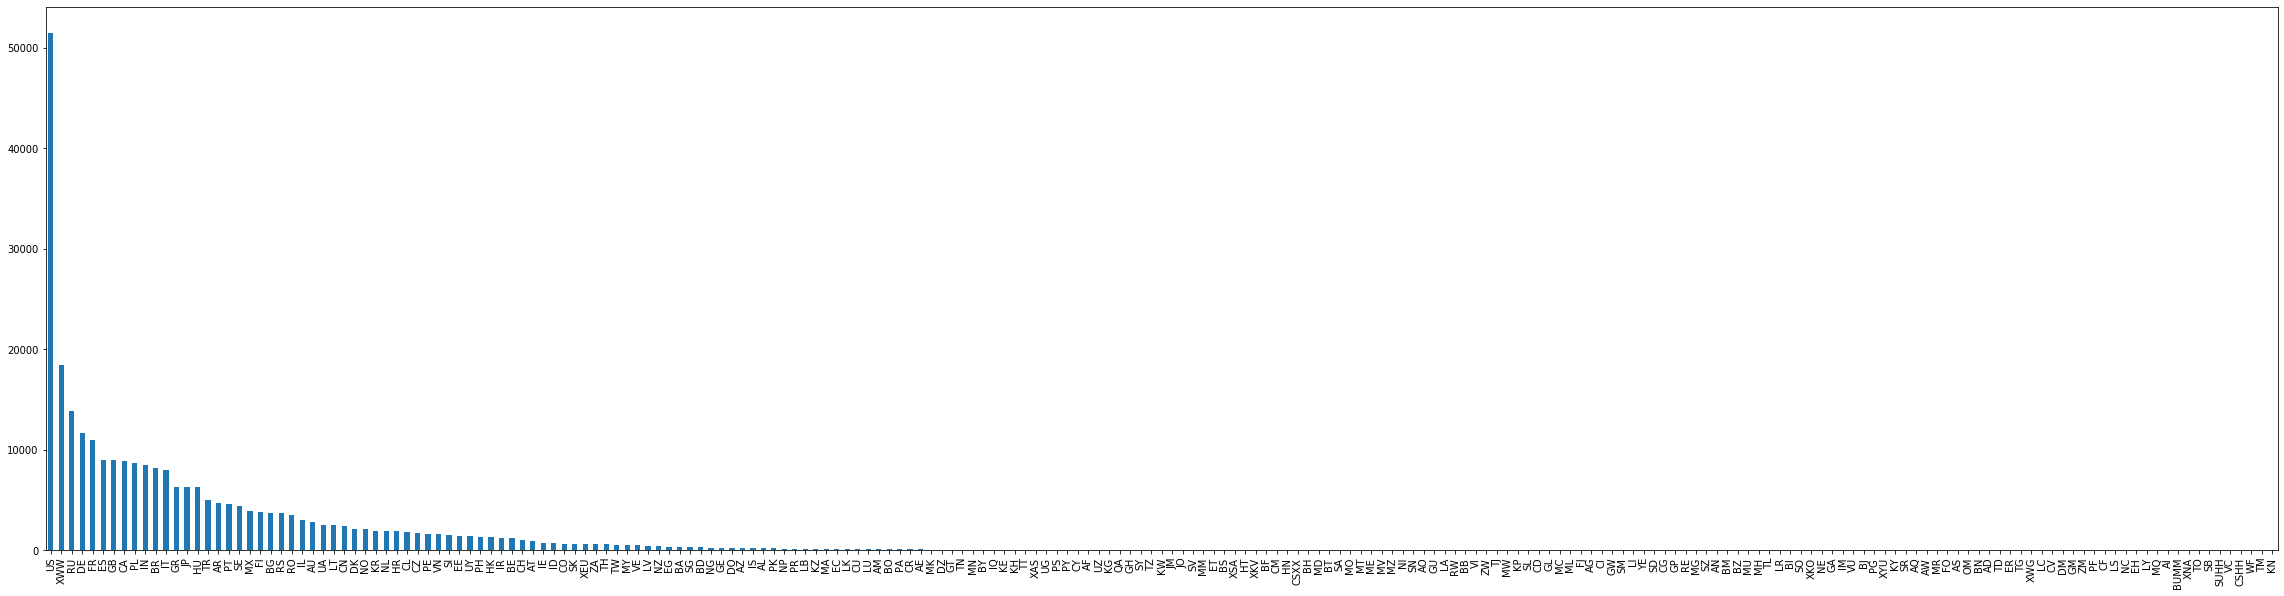

In [192]:
new_imdb_df1['region'].value_counts().plot(kind = 'bar', figsize = (40, 10)) 

In [193]:
new_imdb_df1['region'].fillna(method = 'bfill', inplace = True) 

In [194]:
new_imdb_df1['types'].value_counts() 

imdbDisplay         100461
original             44700
working               8680
alternative           6564
festival              3307
dvd                   2995
tv                    1617
video                  121
dvdimdbDisplay          1
festivalworking         1
Name: types, dtype: int64

In [195]:
new_imdb_df1['types'].fillna(method = 'bfill', inplace = True)  

In [196]:
new_imdb_df1['types'].value_counts() 

imdbDisplay         169551
original            117682
working              17402
alternative          12596
festival              6060
dvd                   5370
tv                    2804
video                  235
dvdimdbDisplay          2
festivalworking         1
Name: types, dtype: int64

In [197]:
new_imdb_df1.isnull().sum() 

title_id             0
ordering             0
title                0
region               0
types                0
is_original_title    0
dtype: int64

In [198]:
new_imdb_df.head(2)

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [199]:
new_imdb_df1.head()


,title_id,ordering,title,region,types,is_original_title
0,tt0369610,10,Джурасик свят,BG,imdbDisplay,0.0
1,tt0369610,11,Jurashikku warudo,JP,imdbDisplay,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,imdbDisplay,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,imdbDisplay,0.0
4,tt0369610,14,Jurassic World,FR,imdbDisplay,0.0


##### Cleaning imdb_df2 
* pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [200]:
imdb_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [201]:
imdb_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [202]:
imdb_df2.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [203]:
imdb_df3.isnull().sum()

tconst           0
directors     5727
writers      35883
dtype: int64

In [204]:
imdb_df2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [205]:
imdb_df3.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [206]:
imdb_df2[imdb_df2.original_title.isnull()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
39095,tt2397619,Woody Allen: A Documentary,NaN,2012,195.0,NaN
58624,tt3414266,The Outer Loop,NaN,2013,78.0,NaN
62944,tt3616658,The Hangman,NaN,2017,NaN,NaN
79274,tt4548042,Urban Legend: The Blind Side Strangler,NaN,2016,NaN,NaN
80116,tt4599436,Please Don't Eat the Pansies,NaN,2016,NaN,NaN
82058,tt4715728,Regen,NaN,2016,NaN,NaN
82308,tt4732998,Limbo,NaN,2017,NaN,NaN
85353,tt4940426,OldZilla,NaN,2018,NaN,NaN
104040,tt6092540,Rangreza,NaN,2017,NaN,NaN
104418,tt6107024,The Cage,NaN,2017,NaN,NaN


In [207]:
imdb_df2['runtime_minutes'].describe() 

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

In [208]:
imdb_df2.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [209]:
imdb_df2['runtime_minutes'].fillna(imdb_df2['runtime_minutes'].mean(), inplace=True)

In [210]:
imdb_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    146144 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [211]:
imdb_df2['genres'].fillna(method = 'ffill', inplace=True)

In [212]:
imdb_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    146144 non-null float64
genres             146144 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [213]:
imdb_df2['original_title'].fillna(imdb_df2['primary_title'],inplace = True) 

In [214]:
imdb_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146144 non-null object
start_year         146144 non-null int64
runtime_minutes    146144 non-null float64
genres             146144 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [215]:
new_imdb_df2 = imdb_df2

In [216]:
new_imdb_df2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"


##### Cleaning imdb_df3 
* pd.read_csv('zippedData/imdb.title.crew.csv.gz')

In [217]:
imdb_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [218]:
imdb_df3.head(10)

imdb_df3['directors'].fillna(imdb_df3['writers'],inplace = True) 

imdb_df3['writers'].fillna(imdb_df3['directors'],inplace = True) 

imdb_df3[imdb_df3.directors.isnull()]

imdb_df3[imdb_df3.writers.isnull()]

imdb_df3.info()

imdb_df3.fillna(method = 'ffill', inplace=True)

imdb_df3.isnull().sum()

new_imdb_df3 = imdb_df3

new_imdb_df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    141670 non-null object
writers      141670 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,"nm0175726,nm1802864","nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [219]:
imdb_df3.head(10)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,"nm0175726,nm1802864","nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
5,tt0879859,nm2416460,nm2416460
6,tt0996958,nm2286991,"nm2286991,nm2651190"
7,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684"
8,tt10003792,nm10539228,nm10539228
9,tt10005130,nm10540239,"nm5482263,nm10540239"


In [220]:
imdb_df3['directors'].fillna(imdb_df3['writers'],inplace = True) 

In [221]:
imdb_df3['writers'].fillna(imdb_df3['directors'],inplace = True) 

In [222]:
imdb_df3[imdb_df3.directors.isnull()] 

,tconst,directors,writers


In [223]:
imdb_df3[imdb_df3.writers.isnull()] 

,tconst,directors,writers


In [224]:
imdb_df3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    146144 non-null object
writers      146144 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [225]:
imdb_df3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    146144 non-null object
writers      146144 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [226]:
imdb_df3.fillna(method = 'ffill', inplace=True) 

In [227]:
imdb_df3.isnull().sum() 

tconst       0
directors    0
writers      0
dtype: int64

In [228]:
new_imdb_df3 = imdb_df3 

In [229]:
new_imdb_df3.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,"nm0175726,nm1802864","nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


##### Cleaning imdb_df4 
* pd.read_csv('zippedData/imdb.title.principals.csv.gz')

In [230]:
imdb_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [231]:
imdb_df4.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [232]:
imdb_df4['job'].value_counts()

producer                        108168
screenplay                        8172
director of photography           6517
writer                            6479
co-director                       5796
                                 ...  
Screenplay Written By                1
comic strip creator                  1
play "Posh                           1
short story "Adjustment Team         1
contributing cinematographer         1
Name: job, Length: 2965, dtype: int64

In [233]:
imdb_df4['category'].value_counts()

actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: category, dtype: int64

In [234]:
imdb_df4['ordering'].value_counts()

1     143454
2     134649
3     126538
4     117775
5     108862
6     100140
7      90820
8      80587
9      69218
10     56143
Name: ordering, dtype: int64

In [235]:
imdb_df4['characters'].value_counts()

["Himself"]                     43584
["Herself"]                     16127
["Narrator"]                     2218
["Alex"]                          656
["David"]                         620
                                ...  
["Cecil","Sam Smith"]               1
["Mama Kati"]                       1
["Txomin Iban"]                     1
["David Ransier"]                   1
["Ajaib Singh- Paali's dad"]        1
Name: characters, Length: 174762, dtype: int64

In [236]:
imdb_df4.nconst.nunique()

604546

In [237]:
new_imdb_df4 = imdb_df4.fillna({'characters': 'CTN', 'job': 'CTN'})
new_imdb_df4

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,CTN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,CTN,CTN
2,tt0111414,3,nm3739909,producer,producer,CTN
3,tt0323808,10,nm0059247,editor,CTN,CTN
4,tt0323808,1,nm3579312,actress,CTN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,CTN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,CTN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,CTN,CTN
1028184,tt9692684,4,nm6009913,writer,writer,CTN


In [238]:
new_imdb_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           1028186 non-null object
characters    1028186 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


##### Cleaning imdb_df5  
* pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [239]:
imdb_df5.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [240]:
imdb_df5.head() 

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [241]:
new_imdb_df5 = imdb_df5 

In [242]:
new_imdb_df.head() 

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


##### Cleaning tmdb_df  
* pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [243]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [244]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


##### Cleaning tn 
* pd.read_csv('zippedData/tn.movie_budgets.csv.gz') 



In [245]:
tn.head() 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [246]:
tn.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [247]:
tn['release_date']= pd.to_datetime(tn['release_date']) 

In [248]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


##### Cleaning bom 
* pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [249]:
bom.head() 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [250]:
bom.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [251]:
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [252]:
bom['foreign_gross'].value_counts().describe()

count    1204.000000
mean        1.691860
std         1.652394
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        23.000000
Name: foreign_gross, dtype: float64

In [253]:
bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [254]:
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [255]:
bom['foreign_gross'].describe() 

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object

In [256]:
bom['foreign_gross']=bom['foreign_gross'].str.replace(',','').astype(float) 

In [257]:
bom['foreign_gross'].describe() 

count    2.037000e+03
mean     7.487281e+07
std      1.374106e+08
min      6.000000e+02
25%      3.700000e+06
50%      1.870000e+07
75%      7.490000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

In [258]:
bom.isnull().sum() 

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [259]:
bom.describe() 

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.037000e+03,3387.000000
mean,2.874585e+07,7.487281e+07,2013.958075
std,6.698250e+07,1.374106e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.700000e+06,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.790000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [260]:
bom[bom.domestic_gross.isnull()]

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000.0,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000.0,2010
302,White Lion,Scre.,NaN,99600.0,2010
306,Badmaash Company,Yash,NaN,64400.0,2010
327,Aashayein (Wishes),Relbig.,NaN,3800.0,2010
537,Force,FoxS,NaN,4800000.0,2011
713,Empire of Silver,NeoC,NaN,19000.0,2011
871,Solomon Kane,RTWC,NaN,19600000.0,2012
928,The Tall Man,Imag.,NaN,5200000.0,2012
933,Keith Lemon: The Film,NaN,NaN,4000000.0,2012


In [261]:
bom['domestic_gross'].fillna(0, inplace=True)

In [262]:
bom['foreign_gross'].fillna(0, inplace=True)

In [263]:
new_bom = bom.fillna({'studio': 'CTN'})
new_bom.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010


9th DF all null value cleaned

### Shortlisting Data to use for Analysis

In [264]:
tn.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [265]:
tmdb_df.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [266]:
new_imdb_df.head(2)

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [267]:
new_imdb_df1.head(2)

,title_id,ordering,title,region,types,is_original_title
0,tt0369610,10,Джурасик свят,BG,imdbDisplay,0.0
1,tt0369610,11,Jurashikku warudo,JP,imdbDisplay,0.0


In [268]:
new_imdb_df2.head(2) 

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [269]:
new_imdb_df3.head(2) 

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,"nm0175726,nm1802864","nm0175726,nm1802864"


In [270]:
new_imdb_df4.head(2) 

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,CTN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,CTN,CTN


In [271]:
new_imdb_df5.head(2) 

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [272]:
new_bom.head(2) 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010


### Processing Shortlisted Dataframes

For Detailed Analysis

* new_imdb_df2
* new_imdb_df3
* new_bom
* tmdb_df
* tn

For General Analysis

* new_imdb_df
* new_imdb_df1
* new_imdb_df4
* new_imdb_df5

#### Merging & Analysis Data frame new_imdb_df2 & new_imdb_df3 

In [273]:
new_imdb_df2 = new_imdb_df2.set_index('tconst') 

In [274]:
new_imdb_df3 = new_imdb_df3.set_index('tconst') 

##### Created new merged DF for IMDB

In [275]:
new_imdb_df_2n3 = pd.merge(new_imdb_df2, new_imdb_df3, left_index=True , right_index=True) 

In [276]:
new_imdb_df_2n3.head(2) 

,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,nm0002411


In [277]:
new_imdb_df_2n3.genres.nunique()

1085

In [278]:
new_imdb_df_2n3.start_year.nunique()

19

In [279]:
new_imdb_df_2n3.nunique() 

primary_title      136071
original_title     137787
start_year             19
runtime_minutes       368
genres               1085
directors           99516
writers            115426
dtype: int64

##### Converting int to datetime stamp column 'start_year' 

In [288]:
from datetime import datetime
new_imdb_df_2n3['my_new_datetime'] = new_imdb_df_2n3.start_year.apply(lambda my_year: datetime(my_year, 1, 1, 1, 1, 1)) 

In [289]:
new_imdb_df_2n3.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 8 columns):
primary_title      146144 non-null object
original_title     146144 non-null object
start_year         146144 non-null int64
runtime_minutes    146144 non-null float64
genres             146144 non-null object
directors          146144 non-null object
writers            146144 non-null object
my_new_datetime    146144 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 10.0+ MB


In [293]:
new_imdb_df_2n3.head(2) 

,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,my_new_datetime
tconst,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",2013-01-01 01:01:01
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,nm0002411,2019-01-01 01:01:01


In [298]:
from_ts = '01/01/2021'
to_ts = '01/01/2009'
new_imdb_df_2n3R = new_imdb_df_2n3[(new_imdb_df_2n3['my_new_datetime'] < from_ts) | (new_imdb_df_2n3['my_new_datetime'] > to_ts)]

In [299]:
new_imdb_df_2n3R['my_new_datetime'].value_counts()

2017-01-01 01:01:01    17504
2016-01-01 01:01:01    17272
2018-01-01 01:01:01    16849
2015-01-01 01:01:01    16243
2014-01-01 01:01:01    15589
2013-01-01 01:01:01    14709
2012-01-01 01:01:01    13787
2011-01-01 01:01:01    12900
2010-01-01 01:01:01    11849
2019-01-01 01:01:01     8379
2020-01-01 01:01:01      937
2021-01-01 01:01:01       83
2022-01-01 01:01:01       32
2023-01-01 01:01:01        5
2024-01-01 01:01:01        2
2115-01-01 01:01:01        1
2027-01-01 01:01:01        1
2025-01-01 01:01:01        1
2026-01-01 01:01:01        1
Name: my_new_datetime, dtype: int64

In [303]:
new_imdb_df_2n3R.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 8 columns):
primary_title      146144 non-null object
original_title     146144 non-null object
start_year         146144 non-null int64
runtime_minutes    146144 non-null float64
genres             146144 non-null object
directors          146144 non-null object
writers            146144 non-null object
my_new_datetime    146144 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 15.0+ MB


In [304]:
new_imdb_df_2n3R['year'] = new_imdb_df_2n3R['my_new_datetime'].dt.year
new_imdb_df_2n3R['month'] = new_imdb_df_2n3R['my_new_datetime'].dt.month
new_imdb_df_2n3R['day'] = new_imdb_df_2n3R['my_new_datetime'].dt.day

In [305]:
new_imdb_df_2n3R.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 11 columns):
primary_title      146144 non-null object
original_title     146144 non-null object
start_year         146144 non-null int64
runtime_minutes    146144 non-null float64
genres             146144 non-null object
directors          146144 non-null object
writers            146144 non-null object
my_new_datetime    146144 non-null datetime64[ns]
year               146144 non-null int64
month              146144 non-null int64
day                146144 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 18.4+ MB


##### Locating and selecting only release dates till Jun 2020 

In [307]:
ts = pd.to_datetime('6/30/2020')
imdb_r = new_imdb_df_2n3R.loc[new_imdb_df_2n3R.my_new_datetime <= ts,: ]

In [308]:
imdb_r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146018 entries, tt0063540 to tt9916754
Data columns (total 11 columns):
primary_title      146018 non-null object
original_title     146018 non-null object
start_year         146018 non-null int64
runtime_minutes    146018 non-null float64
genres             146018 non-null object
directors          146018 non-null object
writers            146018 non-null object
my_new_datetime    146018 non-null datetime64[ns]
year               146018 non-null int64
month              146018 non-null int64
day                146018 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 18.4+ MB


In [309]:
imdb_r['year'].max()

2020

In [310]:
imdb_r['year'].min()

2010

In [313]:
imdb_r['year'].value_counts()  

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
Name: year, dtype: int64

#### Analysis dataframe tn

In [314]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [315]:
tn['production_budget']=tn['production_budget'].str.replace(',','')
tn['production_budget']=tn['production_budget'].str.replace('$','')
tn['production_budget']=tn['production_budget'].astype(float)  

In [316]:
tn['domestic_gross']=tn['domestic_gross'].str.replace(',','')
tn['domestic_gross']=tn['domestic_gross'].str.replace('$','')
tn['domestic_gross']=tn['domestic_gross'].astype(float)  

In [317]:
tn['worldwide_gross']=tn['worldwide_gross'].str.replace(',','')
tn['worldwide_gross']=tn['worldwide_gross'].str.replace('$','')
tn['worldwide_gross']=tn['worldwide_gross'].astype(float)  

In [318]:
tn.nunique()  

id                    100
release_date         2418
movie                5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
dtype: int64

##### Extracting Date/month/year from datetime64 ns column 
print (df['date'].dtype)

object

 

df['date'] = pd.to_datetime(df['date'])

 

print (df['date'].dtype)

Datetime64[ns]

For extracting year,month and day to new column,follow the code:

df['year'] = df['date'].dt.year

df['month'] = df['date'].dt.month

df['day'] = df['date'].dt.day

In [319]:
tn['year'] = tn['release_date'].dt.year
tn['month'] = tn['release_date'].dt.month
tn['day'] = tn['release_date'].dt.day

In [320]:
tn['year'].nunique() 

96

In [321]:
tn['day'].nunique()

31

In [322]:
tn['year'].max() 

2020

In [323]:
tn['year'].min() 

1915

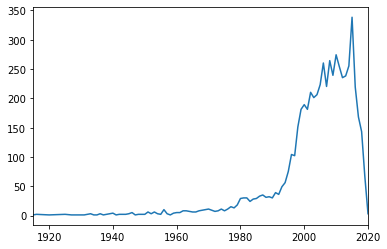

In [324]:
tn['year'].value_counts().sort_index().plot() 

In [326]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,18
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,20
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,7
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,1
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,15


In [327]:
tn.head() 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,18
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,20
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,7
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,1
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,15


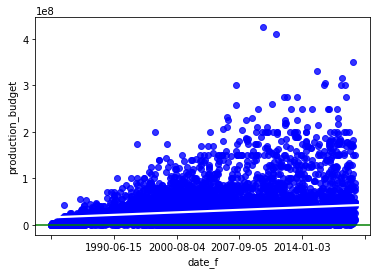

In [329]:
tn = tn.sort_values('release_date')
tn['date_f'] = pd.factorize(tn['release_date'])[0] + 1
mapping = dict(zip(tn['date_f'], tn['release_date'].dt.date))

ax = sns.regplot('date_f', 'production_budget', data=tn,scatter_kws={'color': 'blue'}, line_kws={'color': 'white'}) 
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.axhline(0,color='green')

# ax = sns.regplot(x="total_bill", y="tip", data=tips,
#                  scatter_kws={"color": "black"}, line_kws={"color": "red"})

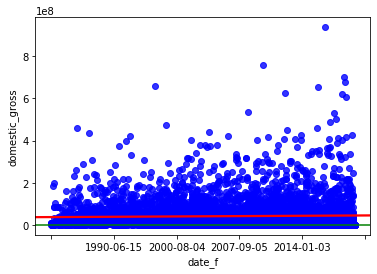

In [330]:
tn.head() 

tn = tn.sort_values('release_date')
tn['date_f'] = pd.factorize(tn['release_date'])[0] + 1
mapping = dict(zip(tn['date_f'], tn['release_date'].dt.date))

ax = sns.regplot('date_f', 'domestic_gross', data=tn,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}) 
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.axhline(0,color='green')

# ax = sns.regplot(x="total_bill", y="tip", data=tips,
#                  scatter_kws={"color": "black"}, line_kws={"color": "red"})

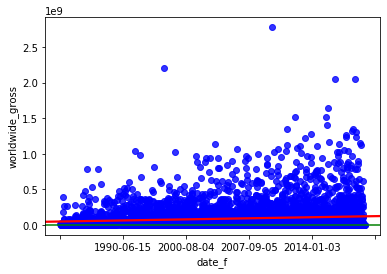

In [331]:
tn.head() 

tn = tn.sort_values('release_date')
tn['date_f'] = pd.factorize(tn['release_date'])[0] + 1
mapping = dict(zip(tn['date_f'], tn['release_date'].dt.date))

ax = sns.regplot('date_f', 'worldwide_gross', data=tn,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}) 
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.axhline(0,color='green')

#### Analysis dataframe new_bom

In [340]:
new_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3387 non-null object
domestic_gross    3387 non-null float64
foreign_gross     3387 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [341]:
new_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


##### Checking duplicates in title

In [344]:
duplicates = new_bom[new_bom.duplicated(subset='title')]
print(len(duplicates))
duplicates.head()

1


,title,studio,domestic_gross,foreign_gross,year
3045,Bluebeard,WGUSA,43100.0,0.0,2017


In [345]:
new_bom[new_bom.duplicated(keep=False)].sort_values(by='title')

,title,studio,domestic_gross,foreign_gross,year


In [349]:
new_bom.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3387 non-null object
domestic_gross    3387 non-null float64
foreign_gross     3387 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [352]:
new_bom['studio'].nunique() 

258

In [353]:
new_bom['year'].nunique() 

9

In [354]:
new_bom['title'].nunique() 

3386

##### Dropping the single duplicate row by creating it as index

In [355]:
i = new_bom[((new_bom.title == 'Bluebeard') & (new_bom.studio == 'WGUSA') & (new_bom.domestic_gross == 43100.0) & (new_bom.foreign_gross == 0.0)  & (new_bom.year == 2017) )].index

In [356]:
new_bom.drop(i) 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


#### Analysis Dataframe tmdb_df

In [357]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [358]:
tmdb_df.nunique() 

Unnamed: 0           26517
genre_ids             2477
id                   25497
original_language       76
original_title       24835
popularity            7425
release_date          3433
title                24688
vote_average            91
vote_count            1693
dtype: int64

In [359]:
tmdb_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


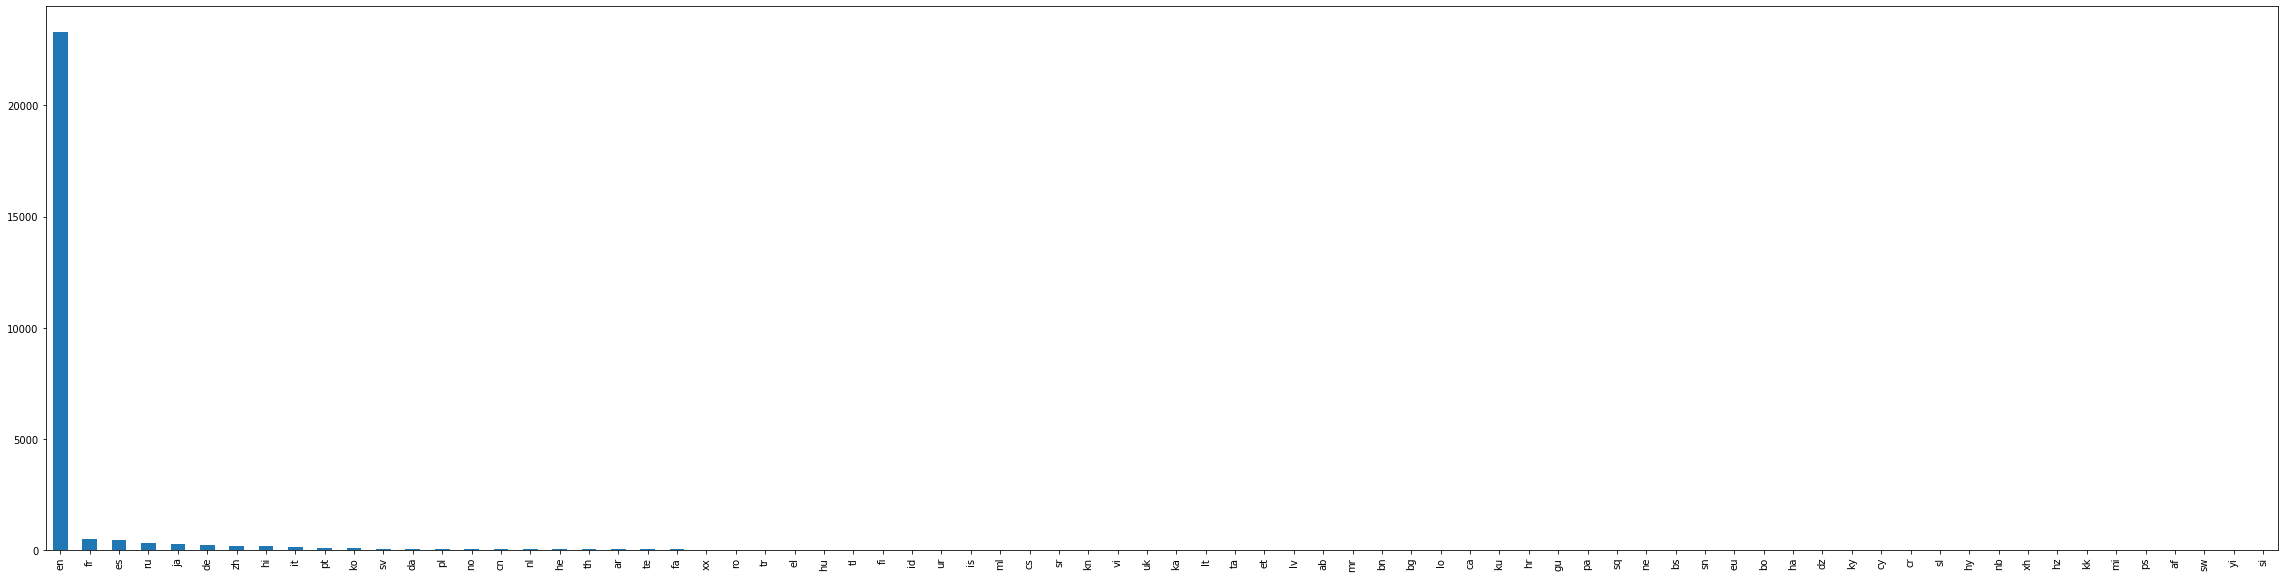

In [360]:
tmdb_df['original_language'].value_counts().plot(kind = 'bar', figsize = (40, 10)) 

In [380]:
tmdb_df['popularity'].nlargest(10) 

23811    80.773
11019    78.123
23812    60.534
11020    53.783
5179     50.289
11021    49.606
20617    48.571
23813    48.571
23814    48.508
23815    48.057
Name: popularity, dtype: float64